In [34]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import scipy.io as sio
from sklearn.metrics import accuracy_score
import random
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn import metrics


# reading csv files
rand = sio.loadmat(r'D:\HomeWork\Pattern\inputs\P3\two_spiral.mat')

points = rand['dataset'][0][0][0]
labels = rand['dataset'][0][0][1]

In [4]:
points

array([[-12.60074484,   0.85742237],
       [  9.04395005,  -3.78780621],
       [-10.9216829 ,  -5.09258338],
       ...,
       [ 11.15331884,  -6.87154829],
       [  7.09806018,   9.27102461],
       [ -4.27935268,   9.67005977]])

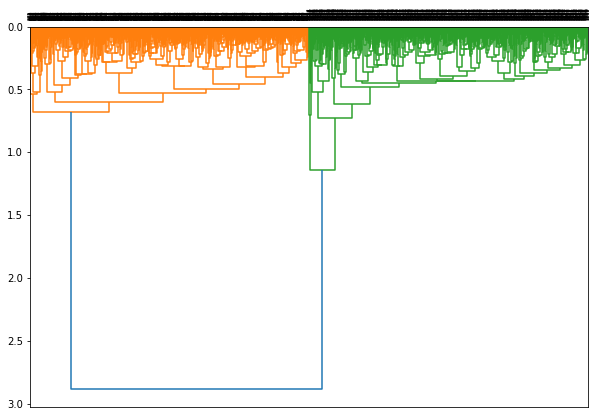

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(points, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='bottom',
            distance_sort='as',
            show_leaf_counts=True)
plt.show()

In [44]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [45]:
clustering = AgglomerativeClustering(linkage = 'complete').fit(points)

In [46]:
a = labels.reshape(1 , 2000)
print("NMI for complete is : " , normalized_mutual_info_score(a[0], clustering.labels_))
print("Purity for complete is : " , purity_score(a[0] , clustering.labels_))

NMI for complete is :  0.036320148104460596
Purity for complete is :  0.6045


In [47]:
clustering = AgglomerativeClustering(linkage = 'single').fit(points)

In [48]:
a = labels.reshape(1 , 2000)
print("NMI for single is : " , normalized_mutual_info_score(a[0], clustering.labels_))
print("Purity for single is : " , purity_score(a[0] , clustering.labels_))

NMI for single is :  1.0
Purity for single is :  1.0


In [50]:
#f for class 0 and s for class 1
def kmeanscluster(X , k , mu , tol , maxIter):
    iteration = 0
    SSE = 100
    
    while iteration < maxIter and tol < SSE:
        
        newSSE = 0
        
        
        newDatas = list()
        
        for item in range(k):
            dist = []
            for i in range(len(X)):
                dist.append(np.linalg.norm(X[i] - mu[:, item:item+1].reshape(len(mu))))
            newDatas.append(np.array(dist))
            
        
        newLabels = np.argmin(np.array(newDatas), axis=0)
        
        means = list()
        for item in range(k):
            arrangedData = []
            for i in range(len(X)):
                if newLabels[i] == item:
                    arrangedData.append(X[i])
            data = np.array(arrangedData)
            newSSE = newSSE + np.sum((data - mu[:, item:item+1].reshape(len(mu)))**2)
            meanData = data.mean(axis = 0)
            means.append(meanData)
        
        meansArray = []

        for i in range(len(means)-1, -1, -1):
            meansArray = [y for x in [meansArray, means[i]] for y in x]
        mu = np.reshape(meansArray, (len(means[0]), k), order='F')
        
        iteration = iteration + 1
        SSE = newSSE
        
        
    return newLabels , SSE

In [64]:
mu = np.array([[-0.08193065 , 6.28],[0.25664401,4.0]])
f , SSE = kmeanscluster(points , 2 , mu , 1 , 20 )

In [65]:
a = labels.reshape(1 , 2000)
print("NMI for complete is : " , normalized_mutual_info_score(a[0], f))
print("Purity for complete is : " , purity_score(a[0] , f))

NMI for complete is :  0.025412392639248924
Purity for complete is :  0.5935
